# Problem 2: Linear regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Part 1: The song of insects

The following data (from The Song of Insects by George W. Pierce, 1948) shows the relationship between chirps (pulses of sound) per second of a cricket and the corresponding ground temperature (measured in degrees Farenheit).

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/crickets.csv' 
data = pd.read_csv(url) 
data

,Chirps/Second,Temperature (F)
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


Plot the data

Text(0, 0.5, 'temperature (F)')

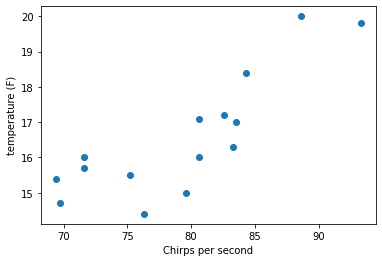

In [4]:
# your code here
y = data['Chirps/Second'].to_numpy()
x = data['Temperature (F)'].to_numpy()
plt.scatter(x,y)
plt.xlabel('Chirps per second')
plt.ylabel('temperature (F)')

Your plot should show that the two variables are roughly correlated: the higher the temperature, the faster the crickets chirp.

Fit a line to your data, and plot the fitted line and the data.

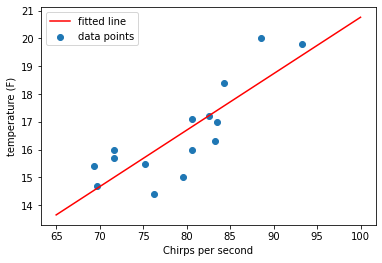

In [10]:
# your code here
m = len(x)
X = np.ones((m,2))
X[:,1]=x
theta = np.linalg.lstsq(X,y,rcond=None)[0]

m_plot = 100
x_plot = np.linspace(65,100,m_plot)
y_plot = theta[0] + theta[1]*x_plot
plt.plot(x_plot,y_plot,color='red',label='fitted line')

plt.scatter(x,y,label='data points')
plt.xlabel('Chirps per second')
plt.ylabel('temperature (F)')
plt.legend()

## Part 2: Healthy Breakfast

The dataset "cereals" contains, among other variables, the Consumer Reports ratings of 77 cereals and the number of grams of sugar contained in each serving.

In [11]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/cereals.csv'
data = pd.read_csv(url,index_col='name')
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


Fit a linear model

$$
 \mbox{rating} = \theta_0 + \theta_1\cdot \mbox{sugars} + \theta_2\cdot \mbox{fat} + \theta_3\cdot \mbox{fiber}
 $$
 
to the data.

In [13]:
# your code here 
m = len(data)
y = data['rating'].to_numpy()
X = np.ones((m,4))
X[:,1:4] = data[['sugars','fat','fiber']].to_numpy()
theta = np.linalg.lstsq(X,y,rcond=None)[0]

Plot the observed ratings as a function of the predicted raitings.

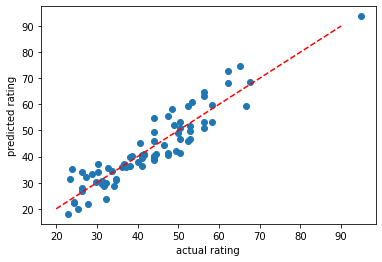

In [16]:
# your code here
y_pred = X.dot(theta)
plt.scatter(y_pred,y)
plt.xlabel('actual rating')
plt.ylabel('predicted rating')
plt.plot([20,90],[20,90],'--',color='red')